In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set_style('darkgrid')

colors = ["#ffbe0b", "#fb5607", "#ff006e", "#8338ec", "#3a86ff"]

### Getting The Data

In [2]:
data_df = pd.read_csv('./Assets/Social_Network_Ads.csv')

data_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data_df.shape

(400, 5)

### Data Preprocessing and Cleaning

In [16]:
data_df["Gender"].replace(["Female", "Male"], [0, 1], inplace=True)

In [17]:
data_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


#### Normalising The Data

In [18]:
data_df["EstimatedSalary"] = data_df["EstimatedSalary"] / max(data_df["EstimatedSalary"])

In [20]:
data_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,0.126667,0
1,15810944,1,35,0.133333,0
2,15668575,0,26,0.286667,0
3,15603246,0,27,0.380000,0
4,15804002,1,19,0.506667,0


In [21]:
data_df["Age"] = data_df["Age"] / max(data_df["Age"])

In [22]:
data_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.316667,0.126667,0
1,15810944,1,0.583333,0.133333,0
2,15668575,0,0.433333,0.286667,0
3,15603246,0,0.450000,0.380000,0
4,15804002,1,0.316667,0.506667,0


### Plotting The Data

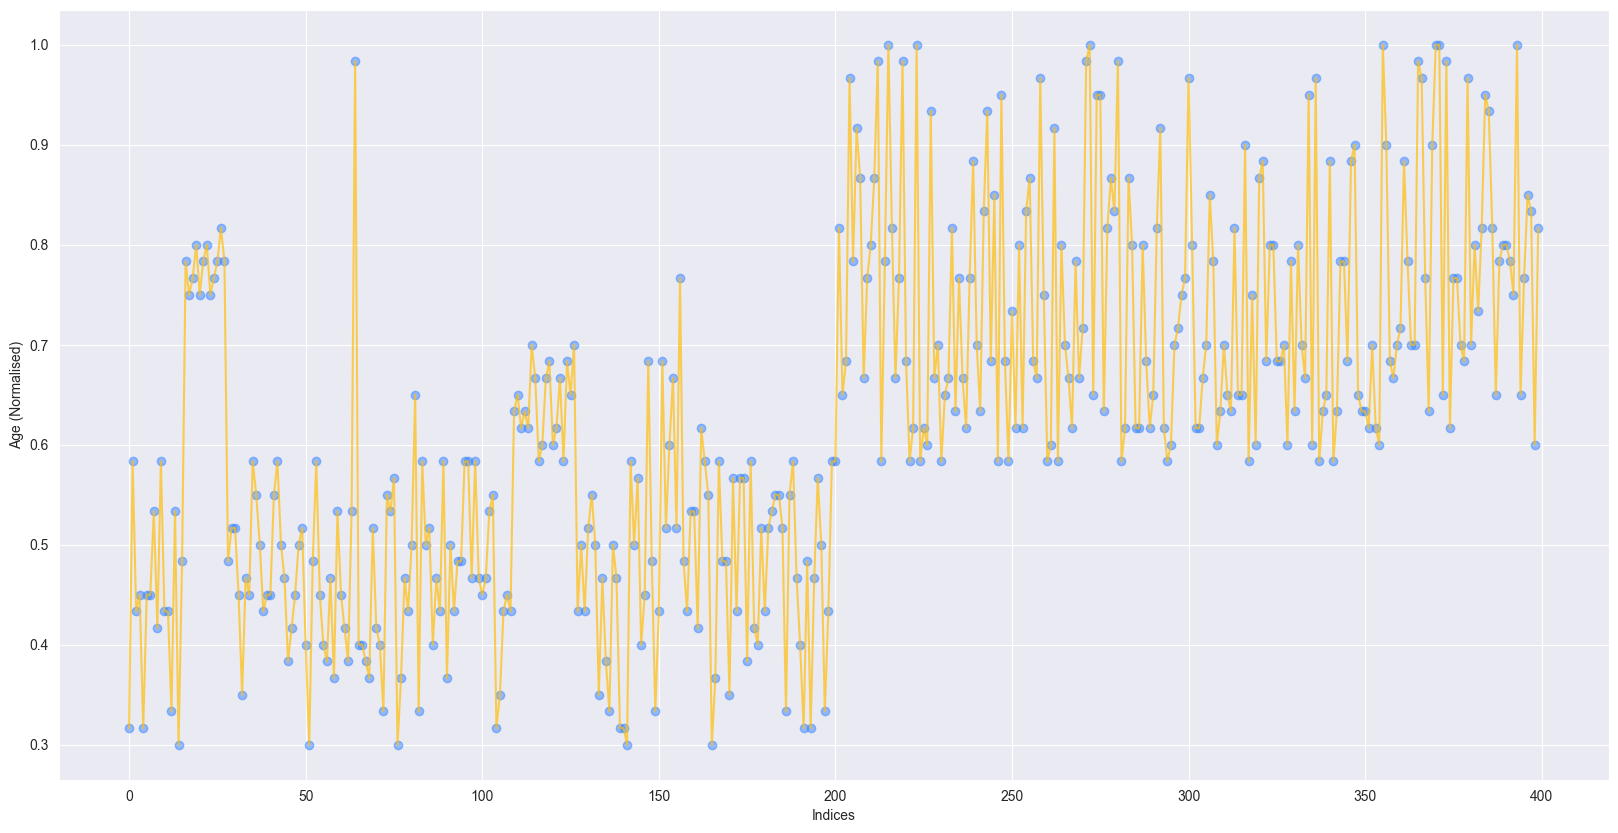

In [36]:
plt.figure(figsize=(20, 10))

plt.plot(data_df.index, data_df["Age"], color=colors[0], alpha=0.7)
plt.scatter(data_df.index, data_df["Age"], color=colors[4], alpha=0.5)

plt.xlabel("Indices")
plt.ylabel("Age (Normalised)")

plt.show()

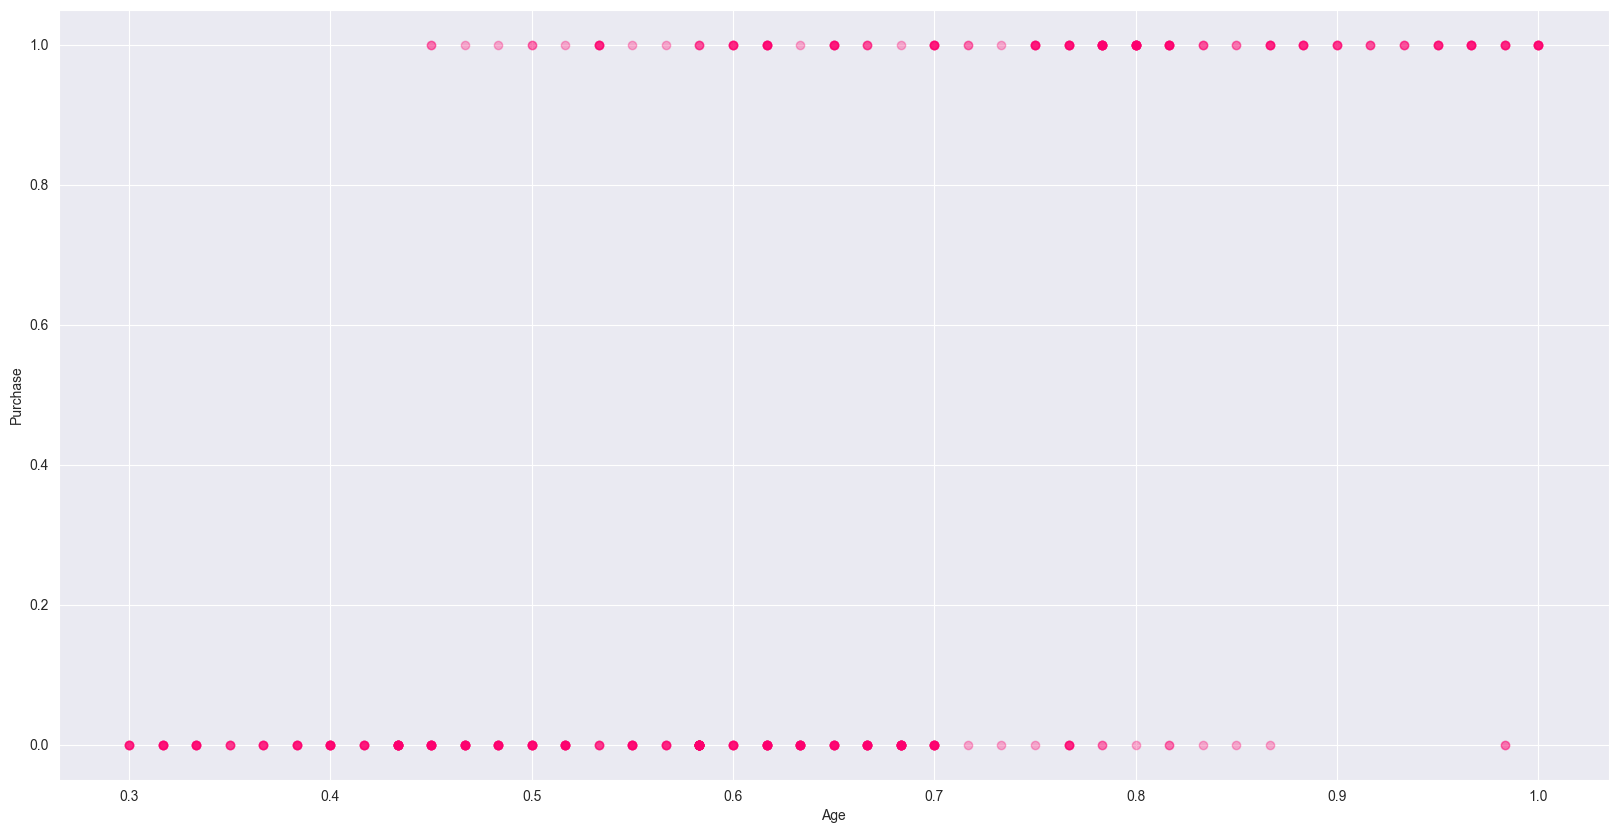

In [41]:
plt.figure(figsize=(20, 10))

plt.scatter(data_df["Age"], data_df["Purchased"], color=colors[2], alpha=0.3)
# plt.scatter(data_df.index, data_df["Age"], color=colors[4], alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Purchase")

plt.show()

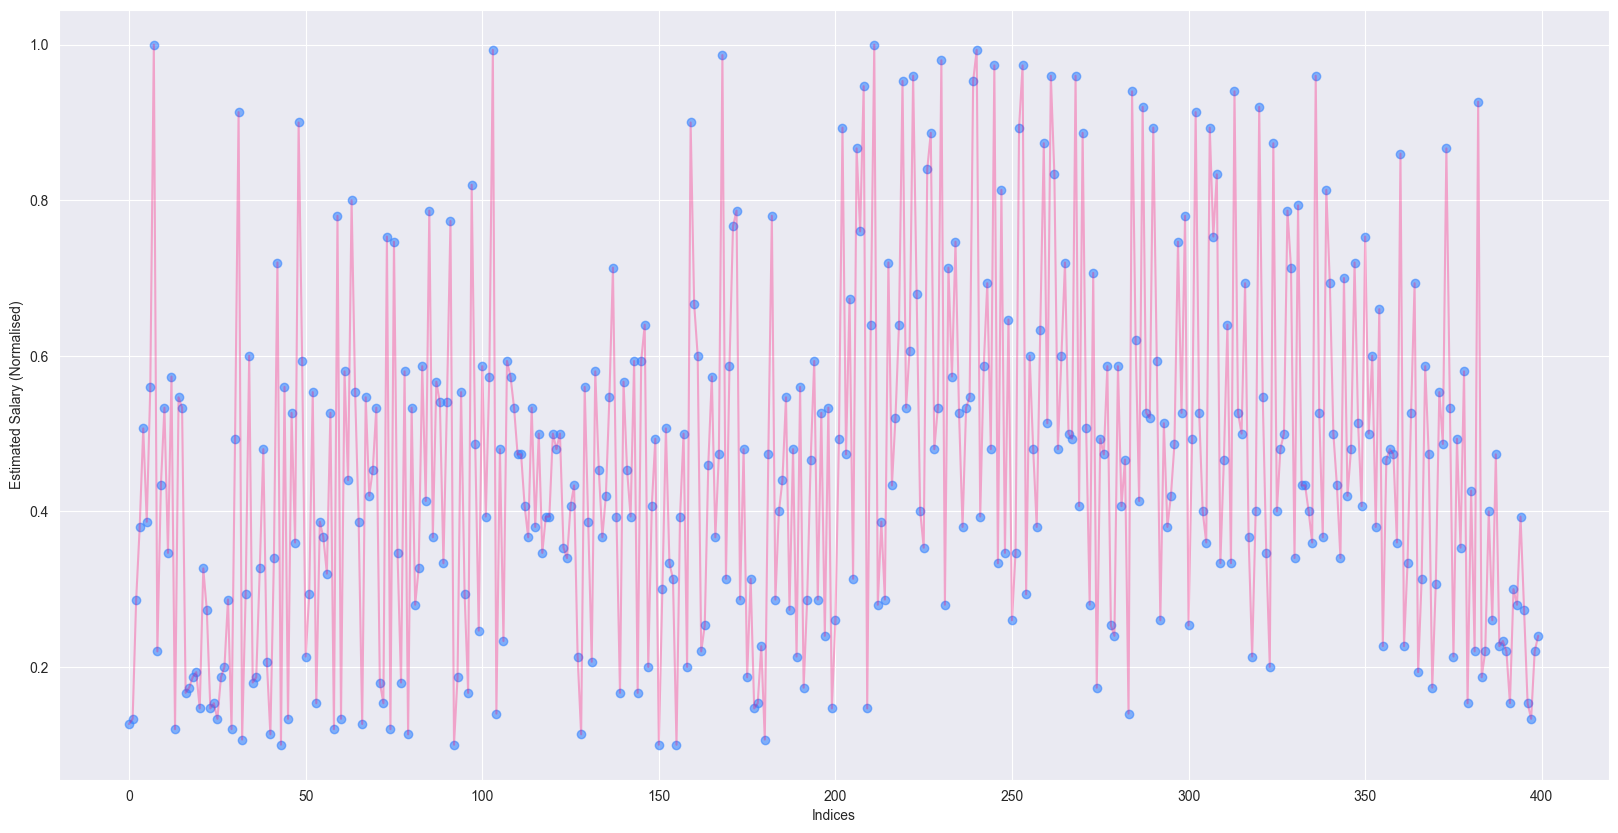

In [47]:
plt.figure(figsize=(20, 10))

plt.plot(data_df.index, data_df["EstimatedSalary"], color=colors[2], alpha=0.3)
plt.scatter(data_df.index, data_df["EstimatedSalary"], color=colors[4], alpha=0.6)

plt.xlabel("Indices")
plt.ylabel("Estimated Salary (Normalised)")

plt.show()

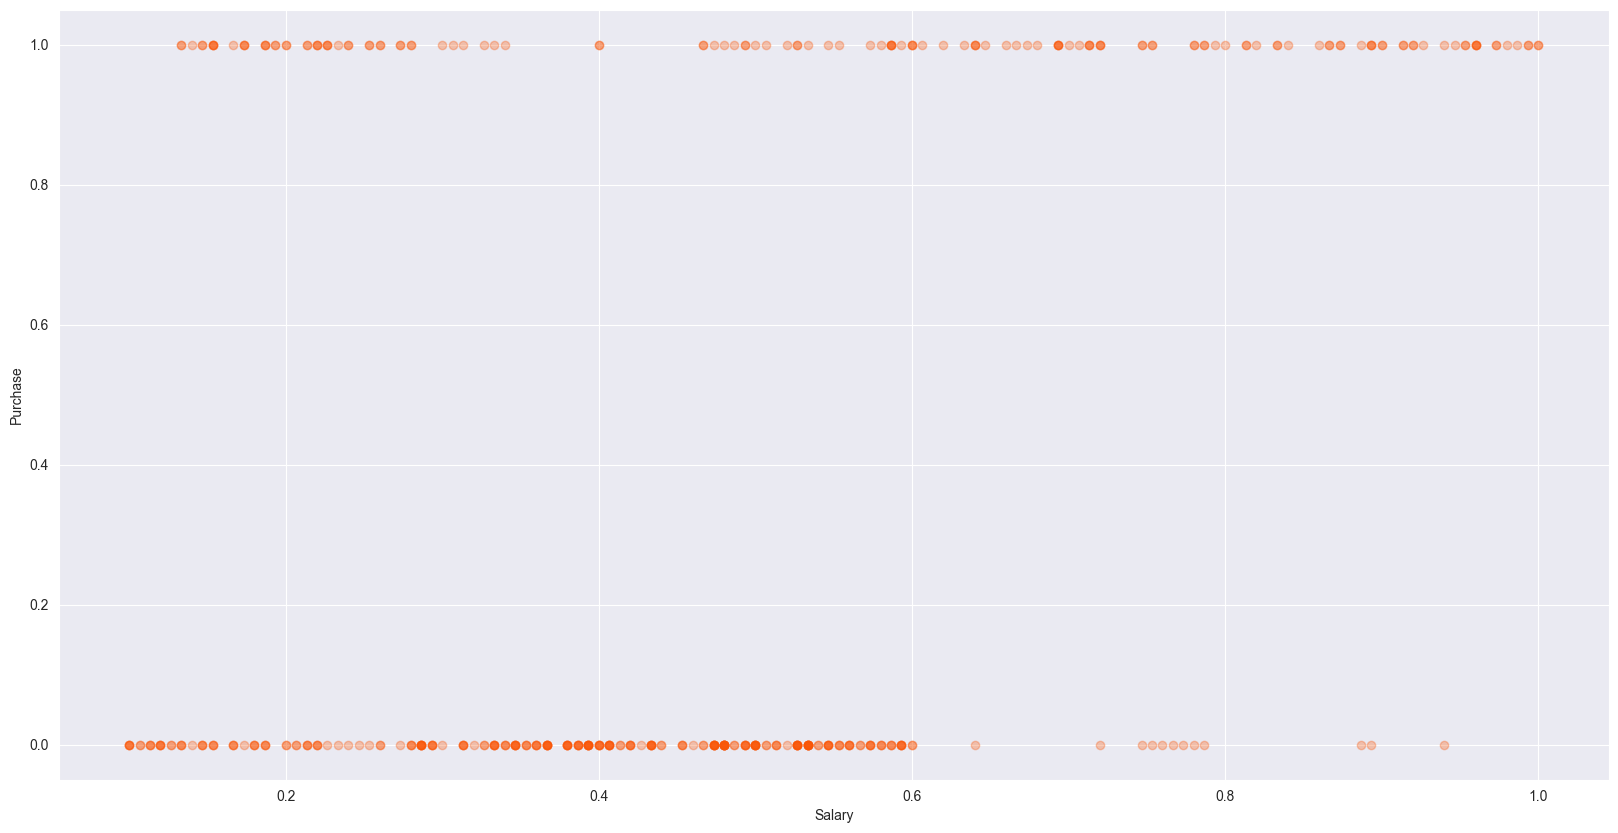

In [49]:
plt.figure(figsize=(20, 10))

plt.scatter(data_df["EstimatedSalary"], data_df["Purchased"], color=colors[1], alpha=0.3)
# plt.scatter(data_df.index, data_df["Age"], color=colors[4], alpha=0.5)

plt.xlabel("Salary")
plt.ylabel("Purchase")

plt.show()

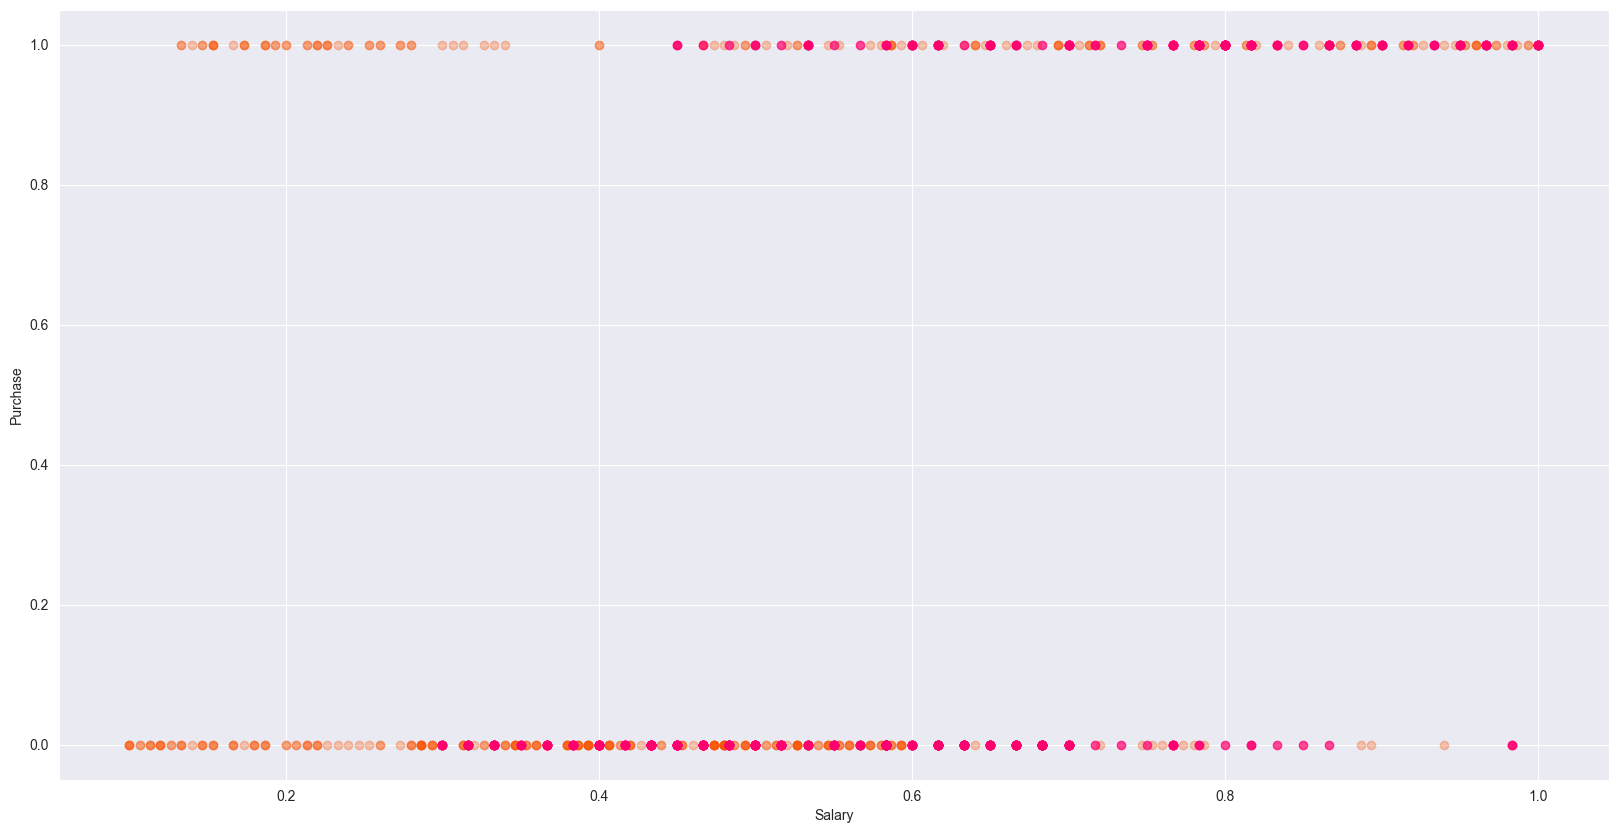

In [51]:
plt.figure(figsize=(20, 10))

plt.scatter(data_df["EstimatedSalary"], data_df["Purchased"], color=colors[1], alpha=0.3)
plt.scatter(data_df["Age"], data_df["Purchased"], color=colors[2], alpha=0.7)

plt.xlabel("Salary")
plt.ylabel("Purchase")

plt.show()

### Getting Data Ready for Model Building

In [59]:
X = data_df[["Gender", "Age", "EstimatedSalary"]]
Y = data_df["Purchased"]

In [60]:
X.head()

,Gender,Age,EstimatedSalary
0,1,0.316667,0.126667
1,1,0.583333,0.133333
2,0,0.433333,0.286667
3,0,0.450000,0.380000
4,1,0.316667,0.506667


In [61]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [64]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [65]:
X_Train.head()

,Gender,Age,EstimatedSalary
3,0,0.450000,0.380000
18,1,0.766667,0.186667
202,0,0.650000,0.893333
250,0,0.733333,0.260000
274,0,0.950000,0.173333


In [55]:
X = tf.convert_to_tensor(data_df[["Gender", "Age", "EstimatedSalary"]], float)
Y = tf.convert_to_tensor(data_df["Purchased"], float)

In [57]:
X[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1.        , 0.31666666, 0.12666667],
       [1.        , 0.5833333 , 0.13333334],
       [0.        , 0.43333334, 0.28666666],
       [0.        , 0.45      , 0.38      ],
       [1.        , 0.31666666, 0.50666666]], dtype=float32)>

In [58]:
Y[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

### Creating A Model

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=len(X_Train.columns)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [71]:
model.fit(X_Train, Y_Train, epochs=700, batch_size=32)

Epoch 1/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8656
Epoch 2/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8687
Epoch 3/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8656
Epoch 4/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8750
Epoch 5/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8625
Epoch 6/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8687
Epoch 7/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8625
Epoch 8/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8719
Epoch 9/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8750
Epoch 10/700
10/10 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8656
Epoch 11/

In [76]:
Y_Res = model.predict(X_Test)

3/3 [==============================] - 0s 3ms/step


In [77]:
Y_Res = [0 if val < 0.5 else 1 for val in Y_Res]

Y_Res[:10]

[1, 1, 0, 1, 0, 0, 1, 0, 0, 0]

In [80]:
accuracy_score(Y_Test, Y_Res) * 100

93.75